## Multi-Inputs Graph
The objective of this agent is to:
1. define a more *more complex* `AgentState`.
2. create a processing node that performs operations on lists.
3. set up a `LangGraph` that processes and outputs computed results.
4. invoke and compile the graph with structured inputs and pull the outputs.

Graph output: 
$$START -> Processing Method -> END$$

In [6]:
from typing import TypedDict
from langgraph.graph import StateGraph
import math

In [ ]:
# define agent state 
"""
The best way to know what to define in the AgentState is to know what the end goal is.
In this case the end goal is to take handle and process multiple inputs. 
"""
class AgentState(TypedDict):
    # the different input types in values (list of intergers), name (str), and result (str)
    values: list[int]
    operation: str
    name: str
    result: str

# define the tool methods -> docstring, state return
def process_values(state: AgentState) -> AgentState:
    """This function handles multiple different inputs."""

    # define the updated result key value
    if state["operation"] == "*":
        state["result"] = f"Hello {state['name']}! Your sum is {math.prod(state['values'])}"
    elif state["operation"] == "+":
        state["result"] = f"Hello {state['name']}! Your sum is {sum(state['values'])}"
    return state

In [ ]:
# define the workflow, nodes, and edges
workflow = StateGraph(AgentState)
workflow.add_node("Processing", process_values)
workflow.set_entry_point("Processing")
workflow.set_finish_point("Processing")
application = workflow.compile()  # MAKE SURE TO ALWAYS COMPILE THE GRAPH IN A VARIABLE (allows us to call get_graph())

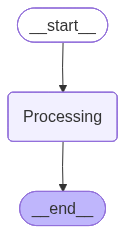

In [9]:
# extra step, but this visualizes the graph we created in LangGraph
from IPython.display import Image, display
display(Image(application.get_graph().draw_mermaid_png()))

In [11]:
input_val = {
    "values": [1, 2, 3, 4, 5],
    "name": "Bob",
    "operation": "+"
}
answers = application.invoke(input_val)
answers["result"]

'Hello Bob! Your sum is 15'